In [46]:
import numpy as np
import pandas as pd

In [47]:
df=pd.read_csv("C:\\Users\\jojic\\OneDrive\\Desktop\\mljourney\\feature-engineering\\naivebayes\\loan\\loan_approval_dataset.csv.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [48]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [49]:
df[df.duplicated].shape

(0, 13)

In [50]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [51]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("encoder",OneHotEncoder(),[" education"," self_employed"])],remainder="passthrough")
x=pd.DataFrame(ct.fit_transform(x))

In [53]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,1.0,0.0,2.0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0
1,0.0,1.0,0.0,1.0,0.0,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0
2,1.0,0.0,1.0,0.0,3.0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0
3,1.0,0.0,1.0,0.0,3.0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0
4,0.0,1.0,0.0,1.0,5.0,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.0,0.0,1.0,5.0,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0
4265,0.0,1.0,0.0,1.0,0.0,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0
4266,0.0,1.0,1.0,0.0,2.0,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0
4267,0.0,1.0,1.0,0.0,1.0,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [55]:
y

array([0, 1, 1, ..., 1, 0, 0], shape=(4269,))

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
1675,0.0,1.0,1.0,0.0,5.0,7900000.0,29900000.0,6.0,568.0,5800000.0,13900000.0,15900000.0,8700000.0
1164,0.0,1.0,0.0,1.0,0.0,9600000.0,34000000.0,12.0,710.0,23800000.0,10300000.0,38100000.0,7800000.0
192,1.0,0.0,1.0,0.0,1.0,800000.0,2900000.0,8.0,682.0,2200000.0,1100000.0,2900000.0,700000.0
910,1.0,0.0,0.0,1.0,2.0,4900000.0,13100000.0,18.0,754.0,8200000.0,3300000.0,16500000.0,7200000.0
567,1.0,0.0,0.0,1.0,5.0,3000000.0,11100000.0,12.0,441.0,8500000.0,2500000.0,7300000.0,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1.0,0.0,0.0,1.0,0.0,1300000.0,4700000.0,16.0,530.0,3200000.0,1000000.0,3800000.0,800000.0
466,0.0,1.0,0.0,1.0,5.0,500000.0,1800000.0,18.0,411.0,1000000.0,500000.0,1300000.0,200000.0
3092,0.0,1.0,0.0,1.0,4.0,8600000.0,20600000.0,16.0,449.0,10800000.0,10600000.0,28700000.0,5400000.0
3772,0.0,1.0,0.0,1.0,2.0,7000000.0,21400000.0,12.0,541.0,3700000.0,1300000.0,19800000.0,9600000.0


In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-1.00263891,  1.00263891,  1.01504731, ...,  2.04678575,
         0.07808278,  1.16041374],
       [-1.00263891,  1.00263891, -0.98517575, ...,  1.22311091,
         2.49843196,  0.88201987],
       [ 0.99736803, -0.99736803,  1.01504731, ..., -0.8818359 ,
        -1.33923881, -1.31419838],
       ...,
       [-1.00263891,  1.00263891, -0.98517575, ...,  1.29175048,
         1.47359943,  0.13963624],
       [-1.00263891,  1.00263891, -0.98517575, ..., -0.83607619,
         0.50327926,  1.4388076 ],
       [ 0.99736803, -0.99736803,  1.01504731, ..., -0.28695963,
         1.03750048, -0.10782497]], shape=(3415, 13))

In [58]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [59]:
y_pred=gb.predict(x_test) 

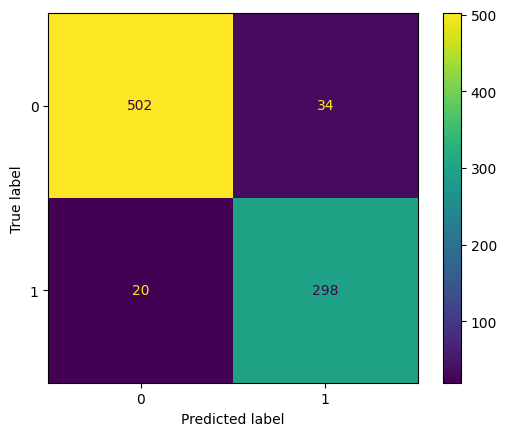

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [61]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy_score:",accuracy_score(y_test,y_pred)*100)
print("precision_score:",precision_score(y_test,y_pred)*100)
print("recall_score:",recall_score(y_test,y_pred)*100)
print("f1_score:",f1_score(y_test,y_pred)*100) 

accuracy_score: 93.6768149882904
precision_score: 89.7590361445783
recall_score: 93.71069182389937
f1_score: 91.6923076923077
